In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [2]:
prom_file_path = "../r11n14_tb.parquet"

In [3]:
prom_df = pd.read_parquet(prom_file_path)

In [6]:
prom_df

,node_load15,node_load5,node_load1,node_memory_Active_bytes,node_filesystem_device_error-sum,node_netstat_Icmp_InErrors,node_netstat_Tcp_InErrs,node_netstat_Udp_InErrors,nvidia_gpu_power_usage_milliwatts-max,nvidia_gpu_temperature_celsius-max,isAnomaly
108609119,16.09,16.11,16.11,2.543940e+10,0.0,2.0,0.0,0.0,0.0,0.0,0
108609120,16.09,16.10,16.07,2.530860e+10,0.0,2.0,0.0,0.0,0.0,0.0,0
108609121,16.08,16.08,16.04,2.506500e+10,0.0,2.0,0.0,0.0,0.0,0.0,0
108609122,16.08,16.08,16.02,2.532350e+10,0.0,2.0,0.0,0.0,0.0,0.0,0
108609123,16.08,16.07,16.01,2.542330e+10,0.0,2.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
109007634,16.00,16.07,16.12,5.284200e+09,0.0,2.0,0.0,0.0,0.0,0.0,0
109007635,16.00,16.07,16.12,5.284200e+09,0.0,2.0,0.0,0.0,0.0,0.0,0
109007636,16.00,16.07,16.12,5.284200e+09,0.0,2.0,0.0,0.0,0.0,0.0,0
109007637,16.00,16.07,16.12,5.284200e+09,0.0,2.0,0.0,0.0,0.0,0.0,0


/home/wenjun/miniconda3/envs/python_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.80      0.80      0.80     24560
           1       0.60      0.59      0.59     12286

    accuracy                           0.73     36846
   macro avg       0.70      0.70      0.70     36846
weighted avg       0.73      0.73      0.73     36846

Confusion matrix:
 [[19653  4907]
 [ 5034  7252]]
ROC AUC Score: 0.6952344628641693


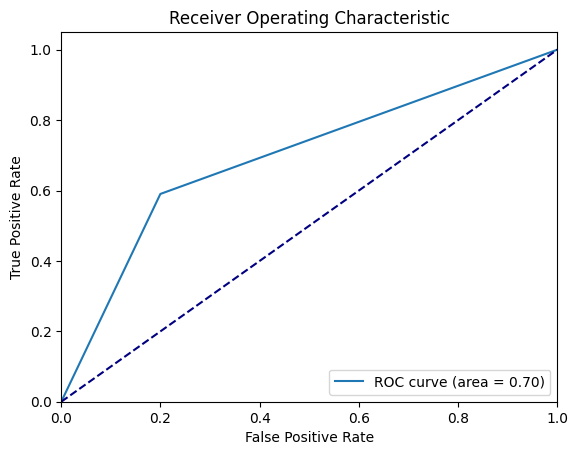

In [6]:
import joblib
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
prom_df = prom_df.drop('node', axis=1)

prom_df = prom_df.drop('timestamp', axis=1)

feature_cols = [col for col in prom_df.columns if col != 'isAnomaly']

iforest = IsolationForest(contamination=0.33)

iforest.fit(prom_df[feature_cols])

pred = iforest.predict(prom_df[feature_cols])

pred_labels = [1 if i == -1 else 0 for i in pred]

print(classification_report(prom_df['isAnomaly'], pred_labels))

conf_mat = confusion_matrix(prom_df['isAnomaly'], pred_labels)
print('Confusion matrix:\n', conf_mat)

roc_auc = roc_auc_score(prom_df['isAnomaly'], pred_labels)
print('ROC AUC Score:', roc_auc)

fpr, tpr, _ = roc_curve(prom_df['isAnomaly'], pred_labels)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('roc_curve_iforest_r27n19.pdf', format='pdf')

plt.show()


/home/wenjun/miniconda3/envs/python_env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.80      0.81      0.80     24560
           1       0.61      0.60      0.60     12286

    accuracy                           0.74     36846
   macro avg       0.70      0.70      0.70     36846
weighted avg       0.74      0.74      0.74     36846

Confusion matrix:
 [[19780  4780]
 [ 4907  7379]]
ROC AUC Score: 0.7029884522040128


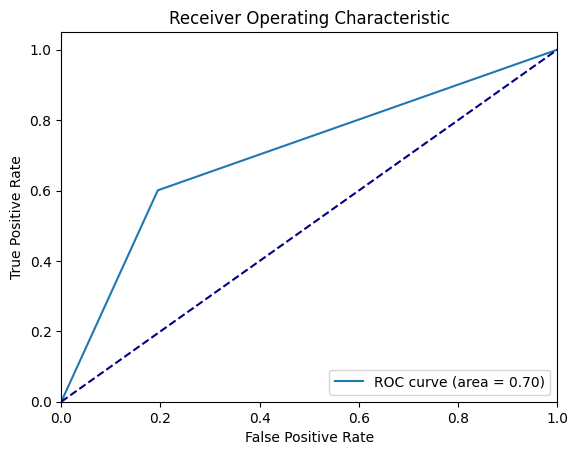

In [4]:
import joblib
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
prom_df = prom_df.drop('node', axis=1)

prom_df = prom_df.drop('timestamp', axis=1)

feature_cols = [col for col in prom_df.columns if col not in ['node', 'timestamp', 'isAnomaly','node_netstat_Udp_InErrors','node_netstat_Tcp_InErrs','node_netstat_Icmp_InErrors','node_filesystem_device_error-sum']]

iforest = IsolationForest(contamination=0.33)

iforest.fit(prom_df[feature_cols])

pred = iforest.predict(prom_df[feature_cols])

pred_labels = [1 if i == -1 else 0 for i in pred]

print(classification_report(prom_df['isAnomaly'], pred_labels))

conf_mat = confusion_matrix(prom_df['isAnomaly'], pred_labels)
print('Confusion matrix:\n', conf_mat)

roc_auc = roc_auc_score(prom_df['isAnomaly'], pred_labels)
print('ROC AUC Score:', roc_auc)

fpr, tpr, _ = roc_curve(prom_df['isAnomaly'], pred_labels)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


plt.show()


In [6]:
prom_df

,node_load15,node_load5,node_load1,node_memory_Active_bytes,node_filesystem_device_error-sum,node_netstat_Icmp_InErrors,node_netstat_Tcp_InErrs,node_netstat_Udp_InErrors,nvidia_gpu_power_usage_milliwatts-max,nvidia_gpu_temperature_celsius-max,isAnomaly
18725805,1.00,1.02,1.00,1.533640e+09,0.0,77.0,0.0,0.0,0.0,0.0,0
18725806,1.00,1.02,1.00,1.531060e+09,0.0,77.0,0.0,0.0,0.0,0.0,0
18725807,1.00,1.01,1.00,1.532320e+09,0.0,77.0,0.0,0.0,0.0,0.0,0
18725808,1.00,1.01,1.00,1.531420e+09,0.0,77.0,0.0,0.0,0.0,0.0,0
18725809,1.00,1.01,1.00,1.532930e+09,0.0,77.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
19091495,5.24,5.07,5.02,4.683920e+10,0.0,77.0,0.0,0.0,0.0,0.0,0
19091496,5.24,5.07,5.06,4.748940e+10,0.0,77.0,0.0,0.0,0.0,0.0,0
19091497,5.23,5.06,5.04,4.820820e+10,0.0,77.0,0.0,0.0,0.0,0.0,0
19091498,5.22,5.06,5.02,4.838980e+10,0.0,77.0,0.0,0.0,0.0,0.0,0


In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

iforest = joblib.load('iforest_model.joblib')

prom_df = prom_df.drop('node', axis=1)
prom_df = prom_df.drop('timestamp', axis=1)

feature_cols = [col for col in prom_df.columns if col != 'isAnomaly']

pred = iforest.predict(prom_df[feature_cols])

pred_labels = [1 if i == -1 else 0 for i in pred]

print(classification_report(prom_df['isAnomaly'], pred_labels))

conf_mat = confusion_matrix(prom_df['isAnomaly'], pred_labels)
print('Confusion matrix:\n', conf_mat)

roc_auc = roc_auc_score(prom_df['isAnomaly'], pred_labels)
print('ROC AUC Score:', roc_auc)

fpr, tpr, _ = roc_curve(prom_df['isAnomaly'], pred_labels)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('roc_curve_iforest_r27n19.pdf', format='pdf')

plt.show()


In [7]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [8]:
import joblib


In [5]:
model_filename = 'r14n17_iforest_model.joblib'
joblib.dump(iforest, model_filename)

['r14n17_iforest_model.joblib']